# 분류 모델 - ensemble model

** 정의 **
- 모형 결합 (model combining), 앙상블 방법론(ensemble methods) : 예측이 아니라 모형을 결합하는 방식
- 모형을 결합하여 더 나은 예측을 하려는 시도
- 모형 결합하면 계산시간은 늘어나지만,
   - 단일 모형 보다 성능 분산 감소 ---> 과최적화 방지
   - 개별 모형이 성능이 안좋을 경우 결합 모형의 성능이 향상됨
- 결합 방법
   - 취합 : aggregation : 사용할 모형의 집합이 이미 결정되어 있음
      - 다수결 : majority
      - 배깅 : bagging
      - 랜덤포레스트 : randomforest
   - 부스팅 : boosting : 사용할 모형을 점진적으로 늘려감
      - 에이다 부스트 : adaboost
      - 그레디언트 부스트 : gradient boost
- 취합 방법 3가지 : 다수결, 배깅, 랜덤포레스트
- 부스트 방법 2가지 : 에이다 부스트, 그레디언트 부스트

** 취합 aggregation : 다수결 방법 majority **
- 가장 단순한 모형결합
- 전혀 다른 모형도 결합할 수 있음
   - hard voting : 단순 투표, 개별 모형의 결과 기준으로 함
   - soft voting : 가중치 투표, 개별 모형의 조건부 확률의 합을 기준으로 함
- sklearn 에 VotingClassifier 클래스가 있음
   - 입력 인수들 (parameter) 
      - estimators : 개별 모형 목록, list, [('lr', model1'), ('qda', model2), ('gnb', model3)]
      - voting : hard, sorft 문자열로 지정
      - weights : 사용자 가중치 리스트
- VotingClassifier를 사용하여 모형결합을 하는 경우
   - hard voting 이면 개별 모형의 클래스 예측값이 몇개인지에 따라서 많은 값을 예측값으로 반환함
   - soft voting 이면 개별 모형에 부여한 가중치 값에 따라서 조건부 확률값의 합을 예측값으로 반환함
- 개별 모형의 갯수 N이 커질 수록 다수결 모형의 성능은 향상된다.
   
** 취합 aggregation : 배깅 방법 bagging **
- 같은 확률모형을 사용하여 랜덤한 데이터를 통해 서로 다른 결과를 출력하는 다수의 모형을 만드는 방식
- 즉 개별 모델 하나로 부트스트래핑 방식으로 train 데이터를 랜덤하게 선택하여 다수결 모형을 결정함
- train 데이터 선택 방법
   - pasting : 같은 데이터 샘플 중복사용하지 않음
   - bagging : 같은 데이터 샘플을 중복사용 함
   - random subspaces : 다차원 독립변수의 일부 차원을 선택 (독립변수 일부만 선택)
   - random patches : 데이터 샘플과 독립변수 차원 모두를 일부만 랜덤하게 선택
- test 데이터 선택 방법
   - OOB : out-of-bag : train 데이터가 아닌 다른 데이터 사용
- sklearn에 BaggingClassifier 클래스를 사용한다.
- 입력 인수 parameter
   - base_estimator : 기본 모형
   - n_estimators : 모형 갯수, 디폴트 10
   - bootstrap : 데이터 중복 사용 여부, pasting, bagging, random spaces, random patches
   - max_samples : 데이터 샘플 중 선택할 샘플의 수 혹은 비율, 디폴트 1.0
   - bootstrap_features : 특징 차원의 중복 사용 여부, 디폴트 False (중복 사용 안함)
   - max_features : 다차원 독립변수 중 선택할 차원의 수 혹은 비율, 디폴트 1.0
- BaggingClassifier(model1, n_estimators=100).fit(X, y)

** 취합 aggregation : 랜덤 포레스트 random forest **
- 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법
   - 다수결이나 배깅 방법은 여러가지 개별 모형을 사용할 수 있음
   - 랜덤 포레스트는 의사결정나무를 사용한 모형 결합 방식
- 데이터의 일부 독립변수(특징차원, 특징벡터)만 사용함
- 노드 분리시 모든 독립변수를 비교하여 최선의 독립변수를 선택하는 것이 아니라 독립변수의 차원(갯수)을 랜덤하게 감소시킨 후 그 중에서 독립변수를 선택한다.
- 개별 모형들의 상관관계가 줄어들어 성능의 변동이 감소한다.
   - DT 자체가 과최적화나 데이터의 변화에 따른 성능 변화가 있을 수 있다.
   - 랜덤포레스트를 사용하면 이러한 성능이 안정화 될 수 있다.
- 이러한 독립변수 선택 방벙을 극단적으로 적용한 것이 Extremely Randomized Trees 모형이다. 
   - 각 노드에서 랜덤하게 독립변수 선택
- RandomforestClassifier, ExtraTreesClassifier 장점
   - 독립변수의 중요도 계산 가능 : model.feature_importances_
   - 이미지 분석에서 어떤 픽셀의 중요도가 높은지 확인 할 수 있다.

** sklearn docs Voting**
- 서로 다른 기계 학습 모델을 결합하고, 다수결 또는 소프트 투표를 사용하여 클래스를 예측한다.
   - hard voting : 다수결 majority : 개별 모델의 예측 클래스의 다수결 결과, 동점인 경우는 오름차순 정렬 후 선택
   - soft voting : 예측 확률 합계의 argmax로 반환한다. 개별 모델에 주어진 가중치에 개별 모델의 클래스별 예측확률 값을 곱한다. 이중에서 평균 확률이 가장 높은 클래스를 선택한다.
      - model_1의 가중치 w1=1, class 1의 예측 확률값이 0.2 이면 : w1 * 0.2
      - 이러한 방식으로 개별모델의 클래스 예측확률값을 구하고, 평균 확률값 계산
- VotingClassifier를 GridSearchCV와 함께 사용할 수 있다.
   - pipe 대신에 VotingClassifier()를 사용하고
   - gridcv의 param_grid 값을 사용할때는 VotingC의 파라미터를 사용한다.

** sklearn docs Bagging **
- 훈련 데이터 세트의 무작위 하위 집합에 black box estimator 를 구축하고 개별 예측을 집계한 후 최종 예측값을 구한다.
- 구성 절차를 무작위화하여  앙상블을 만들기 때문에 기본 추정기 base estimator의 분산을 줄이는데 적합하다.
- 기본 모델을 조정할 필요 없이 쉽게 모델의 성능을 개선할 수 있는 간단한 알고리즘 이다.
- 과적합을 줄여주므로, 강력하고 복잡한 모델에 더 적합하다.
   - 강력하고 복잡한 모델 : 과적합이 높은 상태의 모델 : 모든 잔차, bias에 대해서도 학습을 한 모델, 이러한 경우 추정 된 모수의 값이 엄청나게 크다.
   - 정규화를 통해서 이러한 것을 줄여줄 수도 있지만.
- Bagging은 데이터 세트의 무작위 하위 그룹을 만드는 방식에 따라서 종류가 다름
   - pasting : 훈련 데이터의 무작위 하위 집합이 샘플의 무작위 하위 집합이 되는 경우
   - bagging : 표본을 교체하여 추출하는 방법
   - random subspaces : 독립변수를 무작위로 선택한 데이터로 훈련함
   - random patches : 샘플(데이터)과 특징(독립변수)의 하위 집합으로 훈련함
   
** sklearn docs RandomForest **
- RandomForest와 ExtraTrees는 무작위 의사결정나무 계열의 모델 알고리즘
- 앙상블이 예측은 개별 분류기들의 평균 예측값이 된다.
- RF의 각각의 tree는 훈련 세트에서 추출된 샘플로 구성된다.
   - tree의 노드는 독립변수와 분별규칙에 의해서 나누어진 데이터 집합들로 구성되어 있다.
   - RF도 어떤 규칙에 의해 주어진 훈련 데이터를 나누고, 이러한 나누어진 데이터가 tree에 할당 된다.
   - parameter tunning guideline 참고
- RF의 분산을 줄이는 것이 중요.
   - 개별 tree는 과적합이 되는 경향이 높고, 분산값이 크다.
   - 이러한 것을 막기 위해서 RF에는 훈련 데이터 집합을 만드는데 있어서 무작위성이 있으므로 예측 오류가 다소 줄어든다.
- RF의 대안
   - HGBT : Histogram-Based Gradient Boosting 모델
- RF와 Boosting 의 비교
   - RF는 후보를 뽑기 위해 많은 계산을 필요로 하는 딥 트리 구조에 의존하지만 boosting은 얕은 트리 구조에 의존한다.
   - RF는 다수결을 사용해서 결과를 예측하기때문에 많은 수의 트리가 필요, HGBT에서는 의사결정 트리가 순차적으로 구축, 각 트리는 이전 트리에서 발생한 오류를 수정하도록 훈련하므로 적은 수의 트리를 사용하여 성능을 향상시킨다.
   - RF는 훈련 데이터에 대한 정확한 분할에 의존하므로 계산 비용이 많이 들지만, binning(비닝) 알고리즘을 사용하는 HBGT 부스팅 모델은 규모가 큰 데이터를 사전처리하므로 더 효율적이다.
- RF와 HBGT의 모델을 비교하여 더 나은 것을 사용하는 것을 권장
- 부트스트랩 샘플을 사용한다.
   - bootstrap=True
- feature_importances_ 속성값은 MDI 값에 의존한다. 
   - MDI : mean decrease in impurity : 불순물 평균 감소
   - 각 트리내 불순물 감소 누적의 평균과 표준편차값

** sklearn docs ExtraTrees **
- 훈련데이터 분할의 무작위성이 더 극단적인 모델이다.
   - 최적의 분할규칙을 선택하기 위해 더 무작위성이 높은 형태
- 편향이 커지는 대신 모델의 분산을 줄일 수 있다.
- 부트스트랩 샘플을 기본적으로 사용하지 않고, 전체 데이터를 사용한다.
   - bootstrap=False

** sklearn docs RF 파라미터 튜닝 규칙 **
- main 매개변수
   - n_estimators : RF의 개별 나무의 갯수
      - 클 수록 좋지만 계산 시간이 오래 걸린다.
      - 중요한 나무의 수를 넘어 서면 성능이 더 좋아지진 않는다.
   - max_features : 노드를 분할할 때 고려해야할 feature의 무작위 크기
      - 값이 낮을 수록 즉 feature 갯수가 작을 수록 분산이 감소하지만, 편향이 커진다.
      - 분류 문제에서는 max_features="sqrt"가 일반적이고, 회귀 문제에서는 max_features=1.0 (or None) 이 일반적이다.
- 좋은 결과를 도출하는 예시
   - max_depth=None, min_samples_split=2 (트리를 완전히 개별화 하는 방식)
   - RAM을 많이 사용할 수 있다. 
- 최적의 파라메터 셋팅은 cross-validated 되어야 한다. 
   - 교차검증해서 확인 해야 한다. 
- bootstrap
   - RF는 True : 즉 훈련데이터 세트를 무작위로 뽑는다.
   - EXT는 False : 전체 데이터를 사용한다.
   - oob_score=True 를 설정하면 bootstrap 샘플링을 사용할 떄의 error가 측정된다.
- RF 모델의 크기는 
   - O(나무의 갯수 * 데이터 샘플의 수 * log(N))
   - min_samples_split, max_leaf_nodes, max_depth, min_samples_leaf 매개변수로 숲의 크기를 조정 할 수 있다. 
- n_jobs
   - 병렬 계산
   - n_jobs=2 이면 2개의 core에서 각각 병렬 계산한다.
   - n_jobs=-1 이면 컴퓨터의 모든 core를 사용한다.
   - n_jobs=k 라고 해서 계산 속도가 k 배만큼 빨라지는 것은 아니다

## 취합 aggregation : 다수결 majority 방법

In [1]:
%matplotlib inline

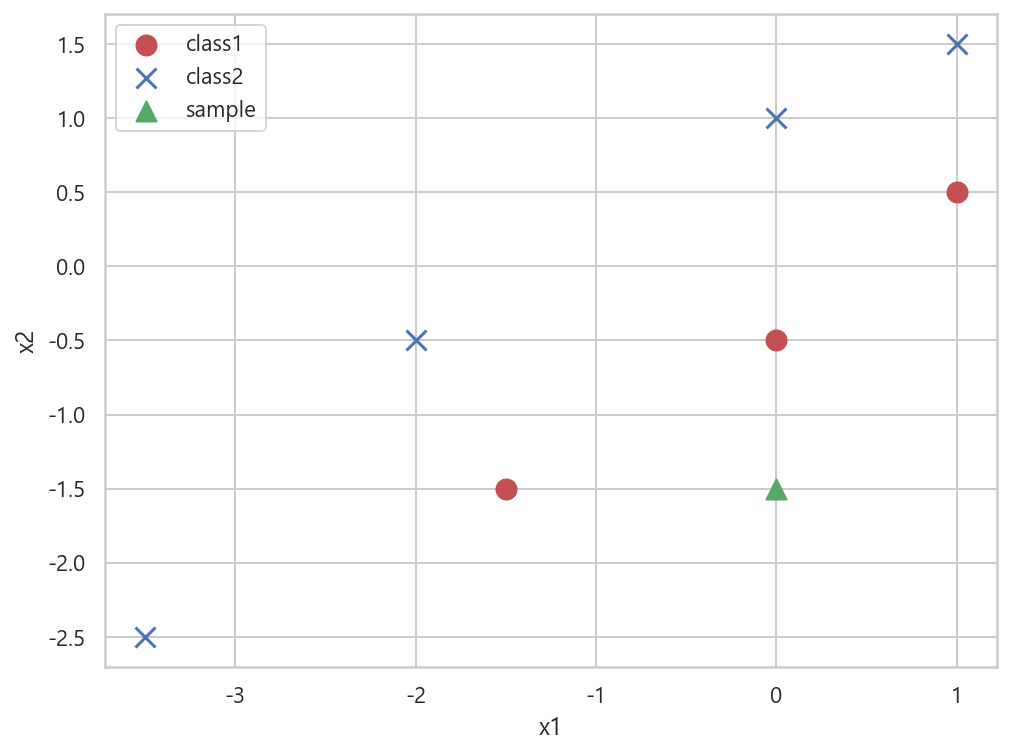

In [2]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], 
              [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="class1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="class2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="sample")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show() ; 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

In [20]:
model_1 = LogisticRegression()
model_2 = QuadraticDiscriminantAnalysis()
model_3 = GaussianNB()
ensemble_1 = VotingClassifier([('lr', model_1), ('qda', model_2), ('gnb', model_3)],
                           voting='soft')
ensemble_2 = VotingClassifier([('lr', model_1), ('qda', model_2), ('gnb', model_3)],
                           voting='hard')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model_1, model_2, model_3, ensemble_1)]
class_1 = [pr[0, 0] for pr in probas] + [1.0]
class_2 = [pr[0, 1] for pr in probas] + [0.0]

In [21]:
probas

[array([[0.7713643, 0.2286357]]),
 array([[9.59836414e-10, 9.99999999e-01]]),
 array([[0.67309197, 0.32690803]]),
 array([[0.48148542, 0.51851458]])]

In [22]:
class_1

[0.771364295516996,
 9.598364138507458e-10,
 0.6730919742971819,
 0.48148542359133817,
 1.0]

In [23]:
class_2

[0.22863570448300394,
 0.9999999990401636,
 0.32690802570281785,
 0.5185145764086617,
 0.0]

In [32]:
np.hstack(([class_1[:-1], [0]]))

array([7.71364296e-01, 9.59836414e-10, 6.73091974e-01, 4.81485424e-01,
       0.00000000e+00])

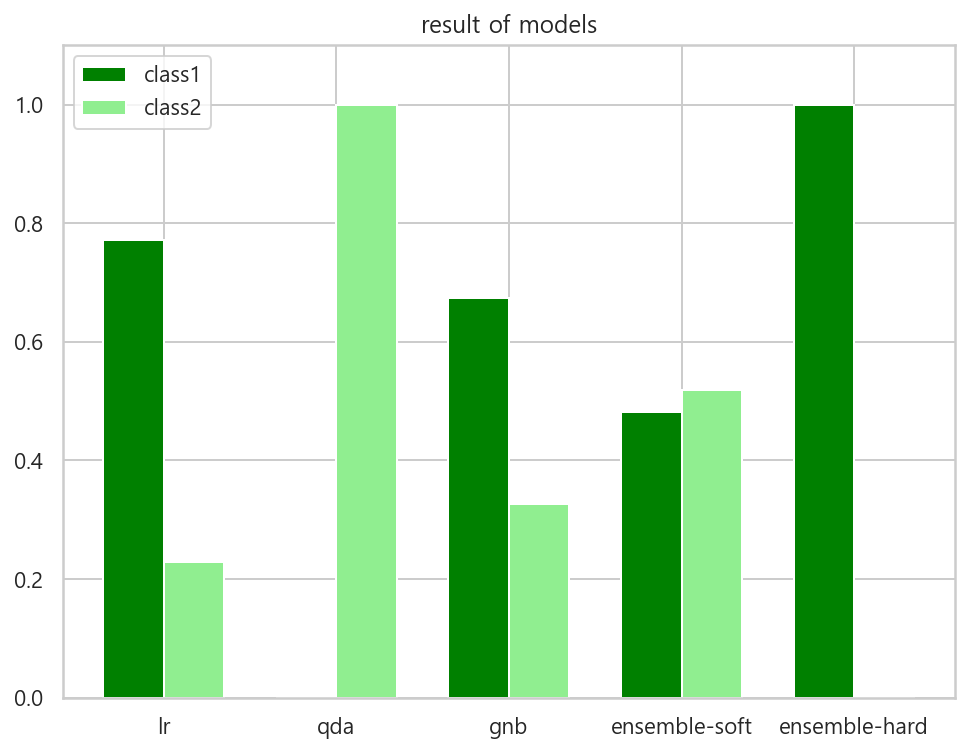

In [33]:
ind = np.arange(5)
width = 0.35
plt.figure(figsize=(8, 6))
p1 = plt.bar(ind, class_1, width, color='green')
p2 = plt.bar(ind + width, class_2, width, color='lightgreen')

plt.xticks(ind + 0.5 * width, ['lr', 'qda', 'gnb', 'ensemble-soft', 'ensemble-hard'])
plt.ylim([0, 1.1])
plt.title("result of models")
plt.legend([p1[0], p2[0]], ['class1', 'class2'], loc='upper left')
plt.show() ; 

In [16]:
ensemble_2.fit(X, y).predict([x_new])

array([1])

In [35]:
from sklearn import datasets

In [41]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [43]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [44]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
y[0]

0

In [46]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.ensemble import VotingClassifier

In [50]:
from sklearn.model_selection import cross_val_score

In [63]:
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier()
model_3 = GaussianNB()
model_4 = BernoulliNB()
model_5 = LinearDiscriminantAnalysis()
model_6 = QuadraticDiscriminantAnalysis()
soft_ensemble = VotingClassifier(estimators=
    [('lr', model_1), ('dt', model_2), ('gbn', model_3), ('bnb', model_4), 
     ('lda', model_5), ('qda', model_6)], voting='soft')
hard_ensemble = VotingClassifier(estimators=
    [('lr', model_1), ('dt', model_2), ('gnb', model_3), ('bnb', model_4),
     ('lda', model_5), ('qda', model_6)])

models = [model_1, model_2, model_3, model_4, model_5, model_6, 
         soft_ensemble, hard_ensemble]
model_names = ['lr', 'dt', 'gnb', 'bnb', 'lda', 'qda', 'soft_e', 'hard_e']

scores = []
for i, model in enumerate(models) : 
    scores.append(cross_val_score(model, X, y, cv=5, scoring='accuracy'))

In [64]:
scores

[array([0.92982456, 0.93859649, 0.95614035, 0.9122807 , 0.94690265]),
 array([0.9122807 , 0.89473684, 0.90350877, 0.93859649, 0.90265487]),
 array([0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.95575221]),
 array([0.62280702, 0.62280702, 0.63157895, 0.63157895, 0.62831858]),
 array([0.95614035, 0.96491228, 0.94736842, 0.96491228, 0.96460177]),
 array([0.97368421, 0.94736842, 0.96491228, 0.94736842, 0.95575221]),
 array([0.96491228, 0.94736842, 0.97368421, 0.96491228, 0.96460177]),
 array([0.96491228, 0.94736842, 0.97368421, 0.96491228, 0.96460177])]

In [76]:
s = dict(zip(model_names, scores))
model_score = [(k, v.mean().round(2)) for k, v in s.items()]
sort_score = dict(np.sort(model_score, axis=0)[::-1])
sort_score

{'soft_e': '0.96',
 'qda': '0.96',
 'lr': '0.96',
 'lda': '0.96',
 'hard_e': '0.94',
 'gnb': '0.94',
 'dt': '0.91',
 'bnb': '0.63'}

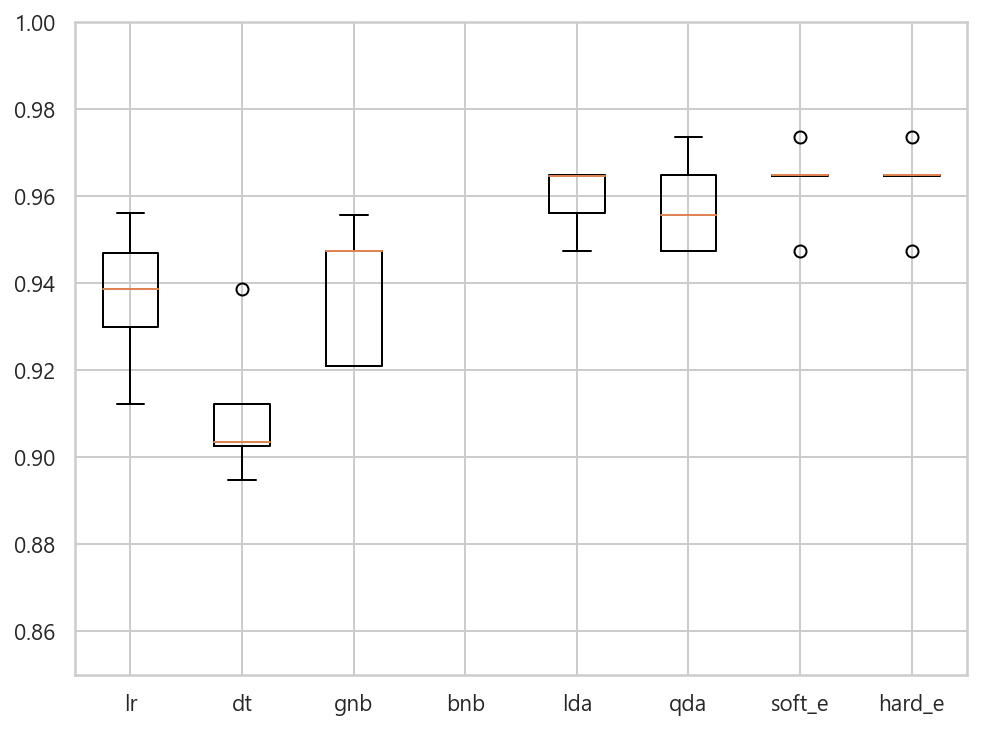

In [78]:
plt.figure(figsize=(8, 6))
plt.boxplot(scores)
plt.ylim([0.85, 1.0])
plt.xticks(range(1, 9), model_names)
plt.show() ; 

In [74]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

## 취합 aggregation - 배깅 bagging 방법
- 하나의 모델을 사용하여 여러 랜덤한 훈련데이터를 학습시켜 여러 모델을 만드는 효과

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [3]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
y[0]

0

In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [6]:
dict(zip(bc.target_names, set(y)))

{'malignant': 0, 'benign': 1}

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [16]:
%matplotlib inline

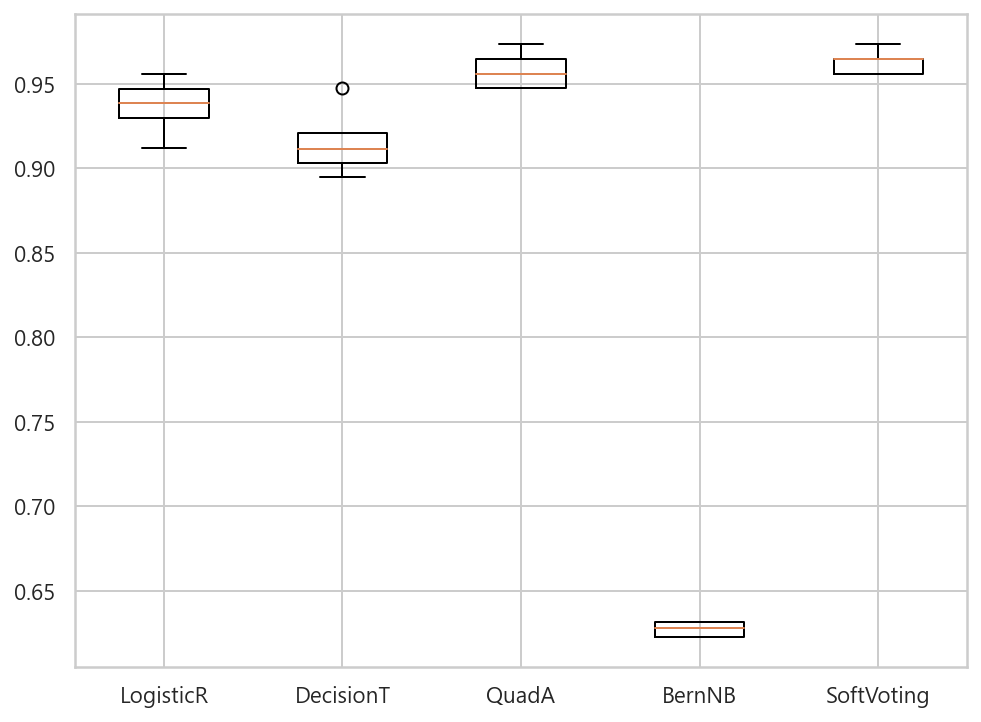

In [22]:
m_1 = LogisticRegression()
m_2 = DecisionTreeClassifier()
m_3 = QuadraticDiscriminantAnalysis()
m_4 = BernoulliNB()
m_5 = VotingClassifier(
    estimators=[('LogisticR', m_1), ('DecisionT', m_2), 
                ('QuadA', m_3), ('BernNB', m_4)], voting='soft')

clfs = [m_1, m_2, m_3, m_4, m_5]
m_names = ['LogisticR', 'DecisionT', 'QuadA', 'BernNB', 'SoftVoting']

scores = []
for model in clfs : 
    model.fit(X, y)
    scores.append(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    
plt.figure(figsize=(8, 6))
plt.boxplot(scores)
plt.xticks(range(1, len(models)), m_names)
plt.show() ; 

In [59]:
result = dict(zip(m_names, np.mean(scores, axis=1).round(2)))
result = [(k, v) for k, v in result.items()]
sort_result = dict(np.sort(result, axis=0)[::-1])
sort_result

{'SoftVoting': '0.96',
 'QuadA': '0.96',
 'LogisticR': '0.94',
 'DecisionT': '0.92',
 'BernNB': '0.63'}

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
m_1 = LogisticRegression()
m_2 = DecisionTreeClassifier()
m_3 = QuadraticDiscriminantAnalysis()
m_4 = BernoulliNB()

pipe = Pipeline([('clf', BaggingClassifier())])
estim = {'clf__base_estimator': [m_1, m_2, m_3, m_4],
        'clf__n_estimators': range(100, 501, 100),
        'clf__bootstrap': [True, False]}

grid = GridSearchCV(estimator=pipe, param_grid=estim, cv=3, scoring='accuracy',
                   verbose=1)
grid.fit(X, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', BaggingClassifier())]),
             param_grid={'clf__base_estimator': [LogisticRegression(),
                                                 DecisionTreeClassifier(),
                                                 QuadraticDiscriminantAnalysis(),
                                                 BernoulliNB()],
                         'clf__bootstrap': [True, False],
                         'clf__n_estimators': range(100, 501, 100)},
             scoring='accuracy', verbose=1)

In [67]:
grid_df = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score", ascending=True)
grid_df[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__base_estimator,param_clf__bootstrap,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,0.546640,0.003361,0.073132,0.000835,QuadraticDiscriminantAnalysis(),True,400,{'clf__base_estimator': QuadraticDiscriminantA...,0.957895,0.963158,0.957672,0.959575,0.002535,1
20,0.139685,0.004331,0.019707,0.001304,QuadraticDiscriminantAnalysis(),True,100,{'clf__base_estimator': QuadraticDiscriminantA...,0.957895,0.963158,0.957672,0.959575,0.002535,1
27,0.390529,0.004425,0.054992,0.001472,QuadraticDiscriminantAnalysis(),False,300,{'clf__base_estimator': QuadraticDiscriminantA...,0.963158,0.963158,0.952381,0.959566,0.005080,3
25,0.133167,0.003225,0.018386,0.000425,QuadraticDiscriminantAnalysis(),False,100,{'clf__base_estimator': QuadraticDiscriminantA...,0.963158,0.963158,0.952381,0.959566,0.005080,3
26,0.261538,0.005285,0.035313,0.000814,QuadraticDiscriminantAnalysis(),False,200,{'clf__base_estimator': QuadraticDiscriminantA...,0.963158,0.963158,0.952381,0.959566,0.005080,3
28,0.515801,0.004466,0.068568,0.000437,QuadraticDiscriminantAnalysis(),False,400,{'clf__base_estimator': QuadraticDiscriminantA...,0.963158,0.963158,0.952381,0.959566,0.005080,3
29,0.665929,0.006934,0.090620,0.002975,QuadraticDiscriminantAnalysis(),False,500,{'clf__base_estimator': QuadraticDiscriminantA...,0.963158,0.963158,0.952381,0.959566,0.005080,3
22,0.396182,0.002836,0.054095,0.000392,QuadraticDiscriminantAnalysis(),True,300,{'clf__base_estimator': QuadraticDiscriminantA...,0.952632,0.963158,0.957672,0.957820,0.004299,8
21,0.275138,0.004676,0.037295,0.000886,QuadraticDiscriminantAnalysis(),True,200,{'clf__base_estimator': QuadraticDiscriminantA...,0.957895,0.963158,0.952381,0.957811,0.004400,9
24,0.678890,0.006022,0.090975,0.002289,QuadraticDiscriminantAnalysis(),True,500,{'clf__base_estimator': QuadraticDiscriminantA...,0.952632,0.963158,0.952381,0.956057,0.005022,10


In [73]:
set(grid_df["param_clf__base_estimator"])

{BernoulliNB(),
 DecisionTreeClassifier(),
 LogisticRegression(),
 QuadraticDiscriminantAnalysis()}

In [62]:
grid.best_estimator_

Pipeline(steps=[('clf',
                 BaggingClassifier(base_estimator=QuadraticDiscriminantAnalysis(),
                                   n_estimators=100))])

In [63]:
grid.best_params_

{'clf__base_estimator': QuadraticDiscriminantAnalysis(),
 'clf__bootstrap': True,
 'clf__n_estimators': 100}

In [65]:
grid.best_score_

0.959574863083635

## 랜덤포레스트
- RandomForestClassifier
   - 의사결정나무를 여러개로 확장하고 합하는 방식
- ExtraTreeClassifier
   - 랜덤포레스트의 방식에서 노드 분리시 독립변수의 차원을 랜덤하게 줄이고 이중에서 독립변수들을 선택함

In [75]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier)

In [76]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

X.shape, y.shape

((400, 4096), (400,))

In [79]:
faces.images[0].shape

(64, 64)

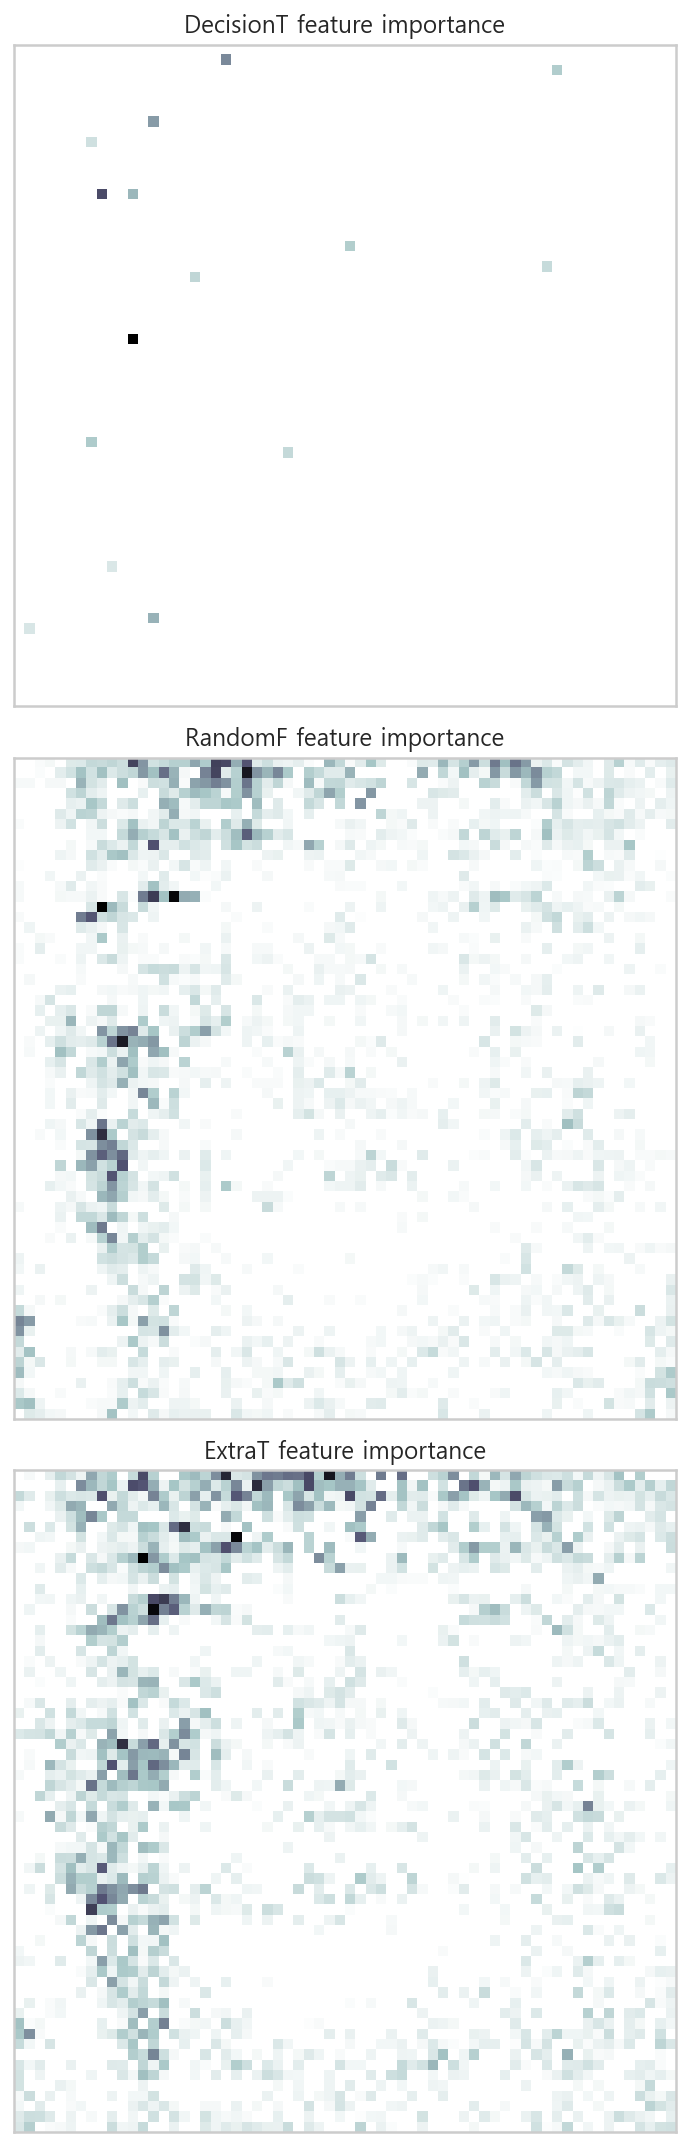

In [86]:
img_shape = faces.images[0].shape
dt_clf = DecisionTreeClassifier(max_depth=4, criterion="entropy")
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=4, criterion="entropy")
ex_clf = ExtraTreesClassifier(n_estimators=200, max_depth=4, criterion="entropy")

models = [dt_clf, rf_clf, ex_clf]
model_names = ["DecisionT", "RandomF", "ExtraT"]

plt.figure(figsize=(15, 15))
for i, model in enumerate(models) : 
    model.fit(X, y)
    plt.subplot(3, 1, i+1)
    imp = model.feature_importances_
    imp = imp.reshape(img_shape)
    plt.imshow(imp, cmap=plt.cm.bone_r)
    plt.title(f"{model_names[i]} feature importance")
    plt.xticks([]) ; plt.yticks([]) ; plt.grid(False)

plt.tight_layout()
plt.show() ; 

## breast cancer data

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                          QuadraticDiscriminantAnalysis)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (VotingClassifier, BaggingClassifier,
                              RandomForestClassifier)

from sklearn.model_selection import KFold, cross_val_score

In [96]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

### Logistic Regression

In [100]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=200)

cv = KFold(5, shuffle=True, random_state=0)
acc_lr = cross_val_score(lr_clf, X, y, cv=cv, scoring="accuracy")
print("lr acc mean : {}, lr acc std : {}".format(acc_lr.mean(), acc_lr.std()))

lr acc mean : 0.9543393882937432, lr acc std : 0.02737172430198312


### LDA/QDA

In [101]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')
qda_clf = QuadraticDiscriminantAnalysis()

cv = KFold(5, shuffle=True, random_state=0)
acc_lda = cross_val_score(lda_clf, X, y, cv=cv, scoring="accuracy")
acc_qda = cross_val_score(qda_clf, X, y, cv=cv, scoring="accuracy")

print("lda acc mean : {}, lda acc std : {}".format(acc_lda.mean(), acc_lda.std()))
print("qda acc mean : {}, qda acc std : {}".format(acc_qda.mean(), acc_qda.std()))

lda acc mean : 0.9543393882937432, lda acc std : 0.013971208636519523
qda acc mean : 0.9613414066138798, qda acc std : 0.014237944009245197


### Gaussing NB

In [103]:
gnb_clf = GaussianNB()

cv = KFold(5, shuffle=True, random_state=0)
acc_gnb = cross_val_score(gnb_clf, X, y, cv=cv, scoring="accuracy")

print("gnb acc mean : {}, gnb acc std : {}".format(acc_gnb.mean(), acc_gnb.std()))

gnb acc mean : 0.9385343890700202, gnb acc std : 0.013469190729616935


### Decision Tree

In [104]:
dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, criterion="gini")

cv = KFold(5, shuffle=True, random_state=0)
acc_dt = cross_val_score(dt_clf, X, y, cv=cv, scoring="accuracy")

print("dt acc mean : {}, dt acc std : {}".format(acc_dt.mean(), acc_dt.std()))

dt acc mean : 0.9138332557056359, dt acc std : 0.02816510027743627


### Voting

In [108]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('lda', lda_clf), ('qda', qda_clf), 
                ('gnb', gnb_clf)], voting='soft')
hard_voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('lda', lda_clf), ('qda', qda_clf), 
               ('gnb', gnb_clf)], voting="hard")

cv = KFold(5, shuffle=True, random_state=0)
acc_soft_voting = cross_val_score(soft_voting_clf, X, y, cv=cv, scoring="accuracy")
acc_hard_voting = cross_val_score(hard_voting_clf, X, y, cv=cv, scoring="accuracy")

print("softvoting acc mean : {}, softvoting acc std : {}" \
      .format(acc_soft_voting.mean(), acc_soft_voting.std()))

print("hardvoting acc mean : {}, hardvoting acc std : {}" \
      .format(acc_hard_voting.mean(), acc_hard_voting.std()))

softvoting acc mean : 0.9648657040832168, softvoting acc std : 0.015665923304341838
hardvoting acc mean : 0.9631113181183044, hardvoting acc std : 0.023777220571157057


### bagging

In [122]:
models = [lr_clf, lda_clf, qda_clf, gnb_clf, dt_clf]
names = ["lr", "lda", "qda", "gnb", "dt"]
cv = KFold(5, shuffle=True, random_state=0)

scores = {}
for i, model in enumerate(models) :
    bagging = BaggingClassifier(base_estimator=model, n_estimators=200)
    acc = cross_val_score(bagging, X, y, cv=cv, scoring="accuracy")
    scores["bagging_" + names[i]] = [acc.mean(), acc.std()]

In [123]:
scores

{'bagging_lr': [0.9578636857630801, 0.026228256633348507],
 'bagging_lda': [0.952585002328831, 0.01305405236401316],
 'bagging_qda': [0.9543238627542309, 0.015048933559746428],
 'bagging_gnb': [0.9367800031051079, 0.01497636064590421],
 'bagging_dt': [0.9437820214252446, 0.026338490935730853]}

### Random Forest

In [124]:
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier)

In [130]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=4, criterion="entropy")
ex_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=False)

cv = KFold(5, shuffle=True, random_state=0)
acc_rf = cross_val_score(rf_clf, X, y, cv=cv, scoring="accuracy")
acc_ex = cross_val_score(ex_clf, X, y, cv=cv, scoring="accuracy")

print("rf acc mean : {}, rf acc std : {}".format(acc_rf.mean(), acc_rf.std()))
print("ex acc mean : {}, ex acc std : {}".format(acc_ex.mean(), acc_ex.std()))

rf acc mean : 0.9578792113025928, rf acc std : 0.02244407776850109
ex acc mean : 0.9719298245614034, ex acc std : 0.017009403008478363


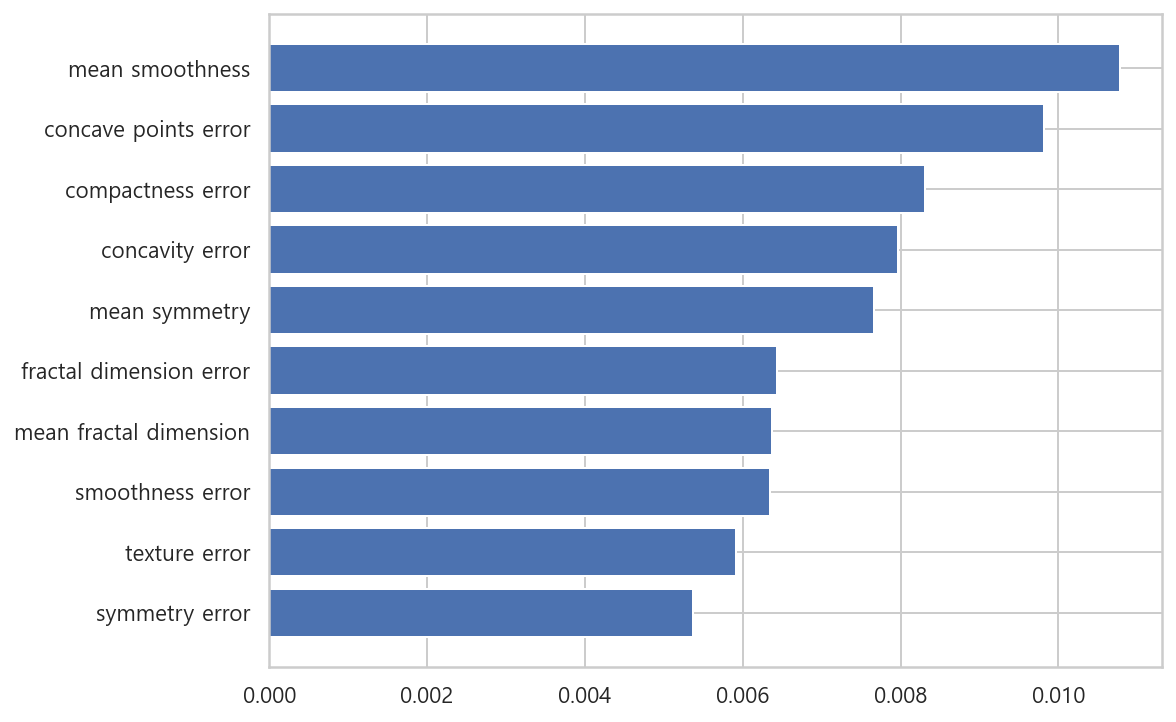

In [135]:
ex_clf.fit(X, y)
idx = np.argsort(ex_clf.feature_importances_)[:10]
features = bc.feature_names[idx]
values = ex_clf.feature_importances_[idx]

plt.figure(figsize=(8, 6))
plt.barh(features, values)
plt.show() ; 

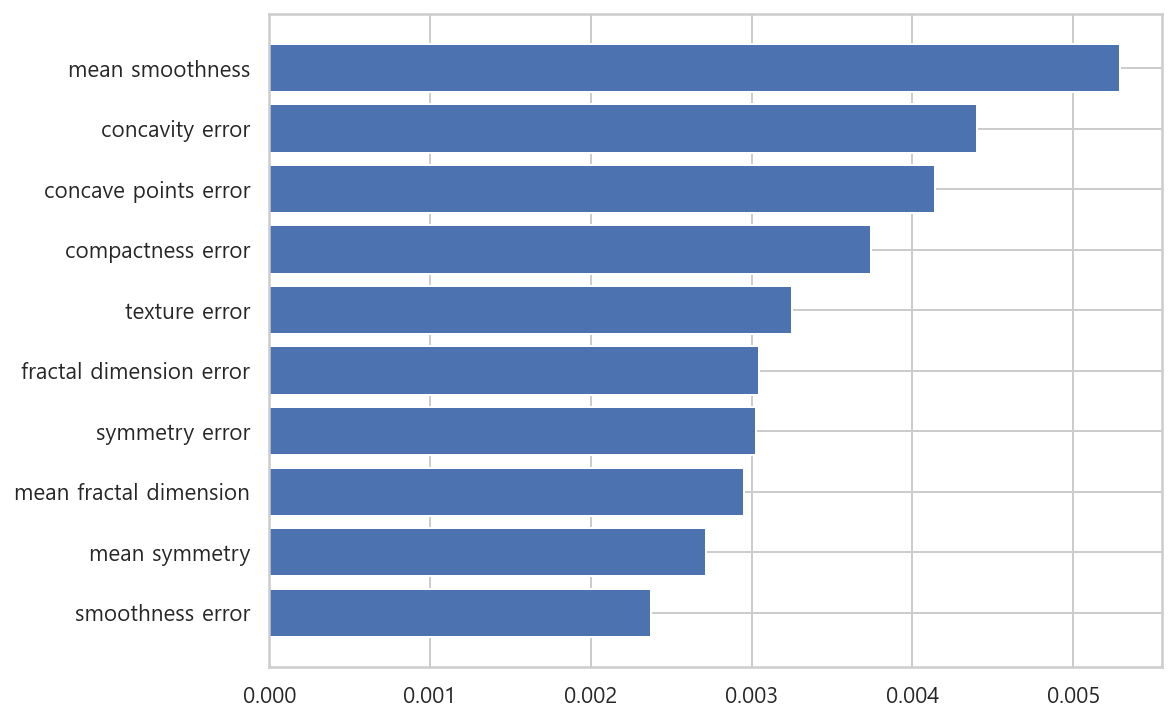

In [137]:
rf_clf.fit(X, y)
idx = np.argsort(rf_clf.feature_importances_)[:10]
features = bc.feature_names[idx]
values = rf_clf.feature_importances_[idx]

plt.figure(figsize=(8, 6))
plt.barh(features, values)
plt.show() ; 

## Random Forest, Extre Trees

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [10]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [11]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [12]:
dict(zip(bc.target_names, set(y)))

{'malignant': 0, 'benign': 1}

In [13]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [92]:
pipe_rf = Pipeline([('clf', RandomForestClassifier())])

params = {}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy")
grid_rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={}, scoring='accuracy')

In [95]:
main_df = pd.DataFrame(grid_rf.cv_results_)
cols = ["mean_fit_time", "params", "mean_test_score", "std_test_score", "rank_test_score"]
grid_rf_df_summary = main_df[cols]
grid_rf_df_summary

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
0,0.126033,{},0.961372,0.021883,1


### 데이터 프레임 concat function

In [126]:
def get_concat_df(df1, df2) : 

    dataframe = pd.concat([df1, df2], axis=0)
    
    return dataframe

### n_estimators test
- 특정 값보다 커지면 성능이 향상되지 않고 유지된다.

In [96]:
params = {"clf__n_estimators": [n for n in range(100, 1000, 100)]}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy")
grid_rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__n_estimators': [100, 200, 300, 400, 500, 600,
                                               700, 800, 900]},
             scoring='accuracy')

In [122]:
result_1 = pd.DataFrame(grid_rf.cv_results_).sort_values("rank_test_score", ascending=True)
result_1 = result_1[cols].reset_index(drop=True)
result_1

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
0,0.360633,{'clf__n_estimators': 300},0.957879,0.022444,1
1,0.480424,{'clf__n_estimators': 400},0.957879,0.022444,1
2,0.591779,{'clf__n_estimators': 500},0.957879,0.025644,1
3,0.718745,{'clf__n_estimators': 600},0.957879,0.022444,1
4,0.846308,{'clf__n_estimators': 700},0.957879,0.022444,1
5,1.075122,{'clf__n_estimators': 900},0.957879,0.022444,1
6,0.123676,{'clf__n_estimators': 100},0.957864,0.024405,7
7,0.240950,{'clf__n_estimators': 200},0.956125,0.022851,8
8,1.005847,{'clf__n_estimators': 800},0.956125,0.022167,8


In [128]:
result_2 = get_concat_df(grid_rf_df_summary, result_1[:1])
result_2

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
0,0.126033,{},0.961372,0.021883,1
0,0.360633,{'clf__n_estimators': 300},0.957879,0.022444,1


### criterion 테스트

In [131]:
params = {
    "clf__n_estimators": [n for n in range(50, 501, 50)],
    "clf__criterion": ["gini", "entropy"]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy")
grid_rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             scoring='accuracy')

In [149]:
cols2 = cols + [k for k in grid_rf.cv_results_.keys() if k[:6] == "param_"]
cols2.sort()

result_3 = pd.DataFrame(grid_rf.cv_results_)[cols2].sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_3[:5]

,mean_fit_time,mean_test_score,param_clf__criterion,param_clf__n_estimators,params,rank_test_score,std_test_score
0,0.561653,0.966667,entropy,350,"{'clf__criterion': 'entropy', 'clf__n_estimato...",1,0.022467
1,0.479246,0.966651,entropy,300,"{'clf__criterion': 'entropy', 'clf__n_estimato...",2,0.021754
2,0.392427,0.964912,entropy,250,"{'clf__criterion': 'entropy', 'clf__n_estimato...",3,0.022874
3,0.179776,0.964881,entropy,100,"{'clf__criterion': 'entropy', 'clf__n_estimato...",4,0.019190
4,0.701401,0.963158,entropy,450,"{'clf__criterion': 'entropy', 'clf__n_estimato...",5,0.023142


In [155]:
result_4 = get_concat_df(result_2, result_3[:5]).reset_index(drop=True)
result_4

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators
0,0.126033,{},0.961372,0.021883,1,NaN,NaN
1,0.360633,{'clf__n_estimators': 300},0.957879,0.022444,1,NaN,NaN
2,0.561653,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966667,0.022467,1,entropy,350
3,0.479246,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966651,0.021754,2,entropy,300
4,0.392427,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964912,0.022874,3,entropy,250
5,0.179776,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964881,0.019190,4,entropy,100
6,0.701401,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.963158,0.023142,5,entropy,450


### max_depth 테스트

In [156]:
params = {
    "clf__n_estimators": [n for n in range(50, 301, 50)],
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [n for n in range(10)]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy")
grid_rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [207]:
cols3 = cols + [k for k in grid_rf.cv_results_.keys() if k[:6] == "param_"]
cols3.sort()
result_5 = pd.DataFrame(grid_rf.cv_results_)[cols3].sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_5.head()

,mean_fit_time,mean_test_score,param_clf__criterion,param_clf__max_depth,param_clf__n_estimators,params,rank_test_score,std_test_score
0,0.070808,0.968421,entropy,8,50,"{'clf__criterion': 'entropy', 'clf__max_depth'...",1,0.022604
1,0.137038,0.966667,entropy,9,100,"{'clf__criterion': 'entropy', 'clf__max_depth'...",2,0.022467
2,0.201262,0.966651,entropy,6,150,"{'clf__criterion': 'entropy', 'clf__max_depth'...",3,0.021754
3,0.407108,0.966651,entropy,9,300,"{'clf__criterion': 'entropy', 'clf__max_depth'...",4,0.021035
4,0.119480,0.966651,gini,9,100,"{'clf__criterion': 'gini', 'clf__max_depth': 9...",4,0.020290


#### 성능에 대한 max_depth, estimator 의 평균

In [205]:
mts_75 = result_5["mean_test_score"].describe()["75%"]
print(mts_75)
result_5[result_5["mean_test_score"] >= mts_75].groupby(["param_clf__criterion"])[["param_clf__max_depth", "param_clf__n_estimators"]].mean().round(2)

0.9613879832324173


,param_clf__max_depth,param_clf__n_estimators
param_clf__criterion,,
entropy,7.0,180.0
gini,7.2,200.0


In [210]:
result_6 = get_concat_df(result_4, result_5[:5])
result_6.sort_values("mean_test_score", ascending=False)

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8
2,0.561653,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966667,0.022467,1,entropy,350,NaN
1,0.137038,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.022467,2,entropy,100,9
3,0.479246,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966651,0.021754,2,entropy,300,NaN
2,0.201262,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966651,0.021754,3,entropy,150,6
3,0.407108,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966651,0.021035,4,entropy,300,9
4,0.119480,"{'clf__criterion': 'gini', 'clf__max_depth': 9...",0.966651,0.020290,4,gini,100,9
4,0.392427,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964912,0.022874,3,entropy,250,NaN
5,0.179776,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964881,0.019190,4,entropy,100,NaN
6,0.701401,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.963158,0.023142,5,entropy,450,NaN


### min_samples_ 테스트

In [216]:
params = {
    "clf__n_estimators": [n for n in range(50, 301, 50)],
    "clf__criterion": ["entropy"],
    "clf__max_depth": [n for n in range(10)],
    "clf__min_samples_leaf": [n for n in range(5)],
    "clf__min_samples_split": [n for n in range(5)]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy", verbose=1)
grid_rf.fit(X, y)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['entropy'],
                         'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__min_samples_leaf': [0, 1, 2, 3, 4],
                         'clf__min_samples_split': [0, 1, 2, 3, 4],
                         'clf__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=1)

In [219]:
cols4 = cols + [k for k in grid_rf.cv_results_.keys() if k[:6] == "param_"]
result_7 = pd.DataFrame(grid_rf.cv_results_)[cols4].sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_7

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators
0,0.413509,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,7,2,4,300
1,0.267340,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,6,3,2,200
2,0.139423,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,5,1,3,100
3,0.407113,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023275,4,entropy,8,2,2,300
4,0.342083,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,7,1,2,250
...,...,...,...,...,...,...,...,...,...,...
1495,0.012566,"{'clf__criterion': 'entropy', 'clf__max_depth'...",NaN,NaN,1496,entropy,5,4,0,50
1496,0.025320,"{'clf__criterion': 'entropy', 'clf__max_depth'...",NaN,NaN,1497,entropy,5,4,0,100
1497,0.037086,"{'clf__criterion': 'entropy', 'clf__max_depth'...",NaN,NaN,1498,entropy,5,4,0,150
1498,0.013161,"{'clf__criterion': 'entropy', 'clf__max_depth'...",NaN,NaN,1499,entropy,2,0,2,50


In [235]:
np.unique(result_7[:20]["param_clf__min_samples_leaf"], return_counts=True)

(array([1, 2, 3], dtype=object), array([9, 9, 2], dtype=int64))

In [229]:
result_8 = get_concat_df(result_6, result_7[result_7["mean_test_score"] >= 0.968])
result_8

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split
0,0.126033,{},0.961372,0.021883,1,NaN,NaN,NaN,NaN,NaN
1,0.360633,{'clf__n_estimators': 300},0.957879,0.022444,1,NaN,NaN,NaN,NaN,NaN
2,0.561653,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966667,0.022467,1,entropy,350,NaN,NaN,NaN
3,0.479246,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966651,0.021754,2,entropy,300,NaN,NaN,NaN
4,0.392427,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964912,0.022874,3,entropy,250,NaN,NaN,NaN
5,0.179776,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.964881,0.019190,4,entropy,100,NaN,NaN,NaN
6,0.701401,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.963158,0.023142,5,entropy,450,NaN,NaN,NaN
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8,NaN,NaN
1,0.137038,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.022467,2,entropy,100,9,NaN,NaN
2,0.201262,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966651,0.021754,3,entropy,150,6,NaN,NaN


In [233]:
result_8.sort_values("mean_test_score", ascending=False)

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split
0,0.413509,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,300,7,2,4
2,0.139423,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,100,5,1,3
1,0.267340,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,200,6,3,2
5,0.201461,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,150,8,3,3
4,0.342083,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,250,7,1,2
3,0.407113,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023275,4,entropy,300,8,2,2
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8,NaN,NaN
2,0.561653,"{'clf__criterion': 'entropy', 'clf__n_estimato...",0.966667,0.022467,1,entropy,350,NaN,NaN,NaN
1,0.137038,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.022467,2,entropy,100,9,NaN,NaN
2,0.201262,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966651,0.021754,3,entropy,150,6,NaN,NaN


### mean_test_score = 0.968421 을 넘을 수 있을까?
- max_depth=None, min_samples_split=2의 조합이 성능이 좋다고함
- min_samples_leaf도 크다고 해서 성능이 높은 것은 아닌 것 같음

In [238]:
params = {
    "clf__n_estimators": [n for n in range(50, 501, 50)],
    "clf__criterion": ["gini", "entropy"],
    "clf__min_samples_leaf": [1, 2],
    "clf__min_samples_split": [2, 3]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy", verbose=1)
grid_rf.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 3],
                         'clf__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             scoring='accuracy', verbose=1)

In [252]:
def get_cols(cols1, grid_rf) : 
    
    cols = cols1 + [k for k in grid_rf.cv_results_.keys() if k[:6] == "param_"]
    
    return cols

In [255]:
cols5 = get_cols(cols, grid_rf)
result_9 = pd.DataFrame(grid_rf.cv_results_)[cols5].sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_9[:10]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators
0,0.609468,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,2,3,450
1,0.408308,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,2,3,300
2,0.482310,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,1,3,350
3,0.613758,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,2,2,450
4,0.408512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023798,1,entropy,2,2,300
5,0.617780,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.022467,6,entropy,1,3,450
6,0.694731,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.022467,6,entropy,1,3,500
7,0.342285,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.964912,0.026022,8,entropy,1,2,250
8,0.412697,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.964912,0.022191,8,entropy,1,2,300
9,0.615089,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.964912,0.022874,8,entropy,1,2,450


In [251]:
grid_rf.best_estimator_["clf"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 350,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [257]:
result_10 = get_concat_df(result_8, result_9[:10])
result_10.sort_values("mean_test_score", ascending=False)

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split
2,0.139423,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,100,5,1,3
1,0.267340,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,200,6,3,2
0,0.413509,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,300,7,2,4
5,0.201461,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,150,8,3,3
4,0.342083,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,250,7,1,2
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8,NaN,NaN
3,0.407113,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023275,4,entropy,300,8,2,2
4,0.408512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023798,1,entropy,300,NaN,2,2
2,0.482310,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,350,NaN,1,3
1,0.408308,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023142,1,entropy,300,NaN,2,3


### 앞의 테스트에서 높은 성능 파라미터 + warm start

In [263]:
params = {
    "clf__n_estimators": [n for n in range(50, 301, 70)],
    "clf__criterion": ["entropy"],
    "clf__max_depth": [5, 6, 7],
    "clf__min_samples_leaf": [1, 2, 3],
    "clf__min_samples_split": [1, 2, 3, 4],
    "clf__warm_start": [True], 
}

cv = KFold(5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=cv, scoring="accuracy", verbose=1)
grid_rf.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['entropy'],
                         'clf__max_depth': [5, 6, 7],
                         'clf__min_samples_leaf': [1, 2, 3],
                         'clf__min_samples_split': [1, 2, 3, 4],
                         'clf__n_estimators': [50, 120, 190, 260],
                         'clf__warm_start': [True]},
             scoring='accuracy', verbose=1)

In [267]:
cols6 = get_cols(cols, grid_rf)
result_11 = pd.DataFrame(grid_rf.cv_results_)[cols6].sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_11[:10]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,param_clf__warm_start
0,0.069414,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.970175,0.018895,1,entropy,7,1,2,50,True
1,0.253242,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968406,0.021182,2,entropy,5,2,2,190,True
2,0.162964,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.023142,3,entropy,6,1,3,120,True
3,0.262179,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.023142,3,entropy,6,2,4,190,True
4,0.067021,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.026837,3,entropy,7,3,2,50,True
5,0.069223,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.020308,3,entropy,7,1,3,50,True
6,0.162366,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.023798,3,entropy,7,2,3,120,True
7,0.163164,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.023142,3,entropy,7,2,2,120,True
8,0.068417,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966636,0.019511,9,entropy,7,1,4,50,True
9,0.350432,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.964912,0.022874,10,entropy,6,2,2,260,True


In [271]:
result_12 = get_concat_df(result_10, result_11[:3]).sort_values("mean_test_score", ascending=False)
result_12

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__warm_start
0,0.069414,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.970175,0.018895,1,entropy,50,7,1,2,True
2,0.139423,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,100,5,1,3,NaN
0,0.413509,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,300,7,2,4,NaN
1,0.267340,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,200,6,3,2,NaN
3,0.407113,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023275,4,entropy,300,8,2,2,NaN
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8,NaN,NaN,NaN
5,0.201461,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,150,8,3,3,NaN
4,0.342083,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,250,7,1,2,NaN
1,0.253242,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968406,0.021182,2,entropy,190,5,2,2,True
4,0.408512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023798,1,entropy,300,NaN,2,2,NaN


In [284]:
rf_best = grid_rf.best_estimator_
rf_best

Pipeline(steps=[('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        n_estimators=50, warm_start=True))])

### Extra Trees

In [322]:
pipe_ex = Pipeline([("clf", ExtraTreesClassifier())])

params_ex = {
    "clf__n_estimators": [n for n in range(100, 1001, 100)] 
}

cv = KFold(5, shuffle=True, random_state=0)
grid_ex = GridSearchCV(estimator=pipe_ex, param_grid=params_ex, cv=cv, scoring="accuracy", verbose=1)
grid_ex.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', ExtraTreesClassifier())]),
             param_grid={'clf__n_estimators': [100, 200, 300, 400, 500, 600,
                                               700, 800, 900, 1000]},
             scoring='accuracy', verbose=1)

In [323]:
result_ = pd.DataFrame(grid_ex.cv_results_).sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.365332,0.005922,0.023936,0.001543,500,{'clf__n_estimators': 500},0.956140,0.973684,0.947368,0.973684,1.00000,0.970175,0.018063,1
1,0.515142,0.007446,0.031317,0.000797,700,{'clf__n_estimators': 700},0.956140,0.973684,0.947368,0.973684,1.00000,0.970175,0.018063,1
2,0.580163,0.009201,0.036296,0.001480,800,{'clf__n_estimators': 800},0.964912,0.964912,0.947368,0.973684,1.00000,0.970175,0.017189,1
3,0.652032,0.012575,0.043876,0.005593,900,{'clf__n_estimators': 900},0.956140,0.973684,0.947368,0.973684,1.00000,0.970175,0.018063,1
4,0.077998,0.007459,0.004987,0.000001,100,{'clf__n_estimators': 100},0.947368,0.973684,0.938596,0.982456,1.00000,0.968421,0.022604,5
5,0.219800,0.003471,0.013970,0.000014,300,{'clf__n_estimators': 300},0.956140,0.973684,0.938596,0.973684,1.00000,0.968421,0.020459,5
6,0.293611,0.006448,0.019349,0.001353,400,{'clf__n_estimators': 400},0.947368,0.973684,0.938596,0.973684,1.00000,0.966667,0.021771,7
7,0.147691,0.005738,0.010377,0.000814,200,{'clf__n_estimators': 200},0.956140,0.973684,0.938596,0.973684,0.99115,0.966651,0.017870,8
8,0.437634,0.013199,0.027128,0.000978,600,{'clf__n_estimators': 600},0.947368,0.973684,0.929825,0.973684,1.00000,0.964912,0.024183,9
9,0.721264,0.015155,0.045080,0.000746,1000,{'clf__n_estimators': 1000},0.947368,0.964912,0.929825,0.973684,1.00000,0.963158,0.023798,10


In [324]:
ex_best_1 = grid_ex.best_estimator_
ex_best_1

Pipeline(steps=[('clf', ExtraTreesClassifier(n_estimators=500))])

### EXT min_samples_split 테스트

In [325]:
pipe_ex = Pipeline([("clf", ExtraTreesClassifier())])

params_ex = {
    "clf__n_estimators": [n for n in range(100, 1001, 100)],
    "clf__min_samples_split": [1, 2, 3]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_ex_2 = GridSearchCV(estimator=pipe_ex, param_grid=params_ex, cv=cv, scoring="accuracy", verbose=1)
grid_ex_2.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', ExtraTreesClassifier())]),
             param_grid={'clf__min_samples_split': [1, 2, 3],
                         'clf__n_estimators': [100, 200, 300, 400, 500, 600,
                                               700, 800, 900, 1000]},
             scoring='accuracy', verbose=1)

In [327]:
result_ex = pd.DataFrame(grid_ex_2.cv_results_).sort_values("rank_test_score", ascending=True).reset_index(drop=True)
result_ex[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.738586,0.017312,0.045079,0.001324,2,1000,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.956140,0.982456,0.947368,0.973684,1.0,0.971930,0.018732,1
1,0.142620,0.002272,0.009973,0.000631,2,200,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.964912,0.982456,0.938596,0.973684,1.0,0.971930,0.020308,1
2,0.356844,0.006536,0.023139,0.000400,2,500,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.964912,0.964912,0.947368,0.973684,1.0,0.970175,0.017189,3
3,0.516216,0.026242,0.032114,0.001595,2,700,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.956140,0.982456,0.938596,0.973684,1.0,0.970175,0.021198,3
4,0.429452,0.009002,0.026926,0.000002,2,600,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.956140,0.982456,0.938596,0.973684,1.0,0.970175,0.021198,3
5,0.219802,0.009119,0.014561,0.000489,3,300,"{'clf__min_samples_split': 3, 'clf__n_estimato...",0.947368,0.982456,0.947368,0.973684,1.0,0.970175,0.020459,6
6,0.574450,0.003577,0.036907,0.001105,3,800,"{'clf__min_samples_split': 3, 'clf__n_estimato...",0.956140,0.973684,0.938596,0.973684,1.0,0.968421,0.020459,7
7,0.428254,0.006167,0.026928,0.000001,3,600,"{'clf__min_samples_split': 3, 'clf__n_estimato...",0.947368,0.982456,0.938596,0.973684,1.0,0.968421,0.022604,7
8,0.288418,0.006460,0.018352,0.000489,3,400,"{'clf__min_samples_split': 3, 'clf__n_estimato...",0.964912,0.964912,0.938596,0.973684,1.0,0.968421,0.019693,7
9,0.689806,0.035682,0.043875,0.003159,2,900,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.956140,0.973684,0.938596,0.973684,1.0,0.968421,0.020459,7


In [330]:
cols_ex = get_cols(cols, grid_ex)

result_ex_1 = result_[cols_ex][:3]
result_ex_1

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__n_estimators
0,0.365332,{'clf__n_estimators': 500},0.970175,0.018063,1,500
1,0.515142,{'clf__n_estimators': 700},0.970175,0.018063,1,700
2,0.580163,{'clf__n_estimators': 800},0.970175,0.017189,1,800


In [343]:
cols_ex = get_cols(cols, grid_ex_2)
ex_df_2 = get_concat_df(result_ex_1, result_ex[cols_ex][:3])
ex_df_2

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__n_estimators,param_clf__min_samples_split
0,0.365332,{'clf__n_estimators': 500},0.970175,0.018063,1,500,NaN
1,0.515142,{'clf__n_estimators': 700},0.970175,0.018063,1,700,NaN
2,0.580163,{'clf__n_estimators': 800},0.970175,0.017189,1,800,NaN
0,0.738586,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.018732,1,1000,2
1,0.142620,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.020308,1,200,2
2,0.356844,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.970175,0.017189,3,500,2


In [339]:
pipe_ex = Pipeline([("clf", ExtraTreesClassifier())])

params_ex = {
    "clf__n_estimators": [n for n in range(100, 1001, 100)],
    "clf__min_samples_split": [1, 2, 3],
    "clf__criterion": ["gini", "entropy"]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_ex_3 = GridSearchCV(estimator=pipe_ex, param_grid=params_ex, cv=cv, scoring="accuracy", verbose=1)
grid_ex_3.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', ExtraTreesClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__min_samples_split': [1, 2, 3],
                         'clf__n_estimators': [100, 200, 300, 400, 500, 600,
                                               700, 800, 900, 1000]},
             scoring='accuracy', verbose=1)

In [342]:
cols_ex = get_cols(cols, grid_ex_3)
result_ex_3 = pd.DataFrame(grid_ex_3.cv_results_)[cols_ex].sort_values("rank_test_score").reset_index(drop=True)
result_ex_3[:10]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__min_samples_split,param_clf__n_estimators
0,0.362390,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.973684,0.017544,1,gini,2,500
1,0.220211,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.018732,2,gini,2,300
2,0.567283,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,entropy,3,700
3,0.573861,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.017009,2,gini,2,800
4,0.743169,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.016079,2,entropy,2,1000
5,0.666001,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,entropy,2,900
6,0.150220,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.018732,2,gini,2,200
7,0.516199,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.018063,8,gini,3,700
8,0.582365,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.018063,8,gini,3,800
9,0.755788,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.021198,8,gini,2,1000


In [344]:
ex_df_3 = get_concat_df(ex_df_2, result_ex_3[:3])
ex_df_3

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__n_estimators,param_clf__min_samples_split,param_clf__criterion
0,0.365332,{'clf__n_estimators': 500},0.970175,0.018063,1,500,NaN,NaN
1,0.515142,{'clf__n_estimators': 700},0.970175,0.018063,1,700,NaN,NaN
2,0.580163,{'clf__n_estimators': 800},0.970175,0.017189,1,800,NaN,NaN
0,0.738586,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.018732,1,1000,2,NaN
1,0.142620,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.020308,1,200,2,NaN
2,0.356844,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.970175,0.017189,3,500,2,NaN
0,0.362390,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.973684,0.017544,1,500,2,gini
1,0.220211,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.018732,2,300,2,gini
2,0.567283,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,700,3,entropy


In [345]:
ex_best_model_2 = grid_ex_3.best_estimator_
ex_best_model_2

Pipeline(steps=[('clf', ExtraTreesClassifier(n_estimators=500))])

In [346]:
pipe_ex = Pipeline([("clf", ExtraTreesClassifier())])

params_ex = {
    "clf__n_estimators": [n for n in range(50, 301, 50)],
    "clf__min_samples_split": [2, 3, 4],
    "clf__criterion": ["gini", "entropy"]
}

cv = KFold(5, shuffle=True, random_state=0)
grid_ex_4 = GridSearchCV(estimator=pipe_ex, param_grid=params_ex, cv=cv, scoring="accuracy", verbose=1)
grid_ex_4.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('clf', ExtraTreesClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__min_samples_split': [2, 3, 4],
                         'clf__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=1)

In [347]:
cols_ex = get_cols(cols, grid_ex_4)
result_ex_4 = pd.DataFrame(grid_ex_4.cv_results_)[cols_ex].sort_values("rank_test_score").reset_index(drop=True)
result_ex_4[:10]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__min_samples_split,param_clf__n_estimators
0,0.185512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.973684,0.017544,1,entropy,4,250
1,0.155776,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,entropy,4,200
2,0.157575,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.018732,2,entropy,2,200
3,0.231565,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.017189,4,gini,4,300
4,0.115888,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.970175,0.018063,4,entropy,4,150
5,0.238558,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.970175,0.018063,4,entropy,2,300
6,0.235504,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.019693,4,gini,2,300
7,0.198266,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.970175,0.021198,4,entropy,3,250
8,0.112495,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.021198,4,gini,3,150
9,0.185713,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.970175,0.018063,4,gini,3,250


In [350]:
ex_df_4 = get_concat_df(ex_df_3, result_ex_4[:3])
ex_df_4 = ex_df_4.sort_values("mean_test_score", ascending=False)
ex_df_4["clf"] = "ExtraT"
ex_df_4

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__n_estimators,param_clf__min_samples_split,param_clf__criterion,clf
0,0.362390,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.973684,0.017544,1,500,2,gini,ExtraT
0,0.185512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.973684,0.017544,1,250,4,entropy,ExtraT
0,0.738586,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.018732,1,1000,2,NaN,ExtraT
1,0.142620,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.020308,1,200,2,NaN,ExtraT
1,0.220211,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.018732,2,300,2,gini,ExtraT
2,0.567283,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,700,3,entropy,ExtraT
1,0.155776,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,200,4,entropy,ExtraT
2,0.157575,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.018732,2,200,2,entropy,ExtraT
0,0.365332,{'clf__n_estimators': 500},0.970175,0.018063,1,500,NaN,NaN,ExtraT
1,0.515142,{'clf__n_estimators': 700},0.970175,0.018063,1,700,NaN,NaN,ExtraT


In [353]:
result_12["clf"] = "RandomF"
result_12

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__warm_start,clf
0,0.069414,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.970175,0.018895,1,entropy,50,7,1,2,True,RandomF
2,0.139423,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,100,5,1,3,NaN,RandomF
0,0.413509,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,300,7,2,4,NaN,RandomF
1,0.267340,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023927,1,entropy,200,6,3,2,NaN,RandomF
3,0.407113,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.023275,4,entropy,300,8,2,2,NaN,RandomF
0,0.070808,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.022604,1,entropy,50,8,NaN,NaN,NaN,RandomF
5,0.201461,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,150,8,3,3,NaN,RandomF
4,0.342083,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968421,0.021198,4,entropy,250,7,1,2,NaN,RandomF
1,0.253242,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.968406,0.021182,2,entropy,190,5,2,2,True,RandomF
4,0.408512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.966667,0.023798,1,entropy,300,NaN,2,2,NaN,RandomF


In [355]:
rf_ex_df = get_concat_df(result_12, ex_df_4).sort_values("mean_test_score", ascending=False).reset_index(drop=True)
rf_ex_df

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score,param_clf__criterion,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__warm_start,clf
0,0.362390,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.973684,0.017544,1,gini,500,NaN,NaN,2,NaN,ExtraT
1,0.185512,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.973684,0.017544,1,entropy,250,NaN,NaN,4,NaN,ExtraT
2,0.157575,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.018732,2,entropy,200,NaN,NaN,2,NaN,ExtraT
3,0.155776,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,entropy,200,NaN,NaN,4,NaN,ExtraT
4,0.567283,"{'clf__criterion': 'entropy', 'clf__min_sample...",0.971930,0.020308,2,entropy,700,NaN,NaN,3,NaN,ExtraT
5,0.220211,"{'clf__criterion': 'gini', 'clf__min_samples_s...",0.971930,0.018732,2,gini,300,NaN,NaN,2,NaN,ExtraT
6,0.142620,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.020308,1,NaN,200,NaN,NaN,2,NaN,ExtraT
7,0.738586,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.971930,0.018732,1,NaN,1000,NaN,NaN,2,NaN,ExtraT
8,0.356844,"{'clf__min_samples_split': 2, 'clf__n_estimato...",0.970175,0.017189,3,NaN,500,NaN,NaN,2,NaN,ExtraT
9,0.580163,{'clf__n_estimators': 800},0.970175,0.017189,1,NaN,800,NaN,NaN,NaN,NaN,ExtraT


In [356]:
ex_best = grid_ex_4.best_estimator_
ex_best

Pipeline(steps=[('clf',
                 ExtraTreesClassifier(criterion='entropy', min_samples_split=4,
                                      n_estimators=250))])

In [357]:
rf_best

Pipeline(steps=[('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        n_estimators=50, warm_start=True))])

In [358]:
from sklearn.ensemble import VotingClassifier

In [365]:
voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('ex', ex_best)], voting="soft")

voting_acc = cross_val_score(voting_clf, X, y, cv=5, scoring="accuracy").mean()
rf_acc = cross_val_score(rf_best, X, y, cv=5, scoring="accuracy").mean()
ex_acc = cross_val_score(ex_best, X, y, cv=5, scoring="accuracy").mean()

print("voting acc : {}".format(voting_acc))
print("rf acc : {}".format(rf_acc))
print("ex acc : {}".format(ex_acc))

voting acc : 0.9683744760130415
rf acc : 0.9631268436578171
ex acc : 0.9648812296227295


In [367]:
ex_best["clf"].get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [368]:
rf_best["clf"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': True}